# Лабораторная работа №1 — Исследование набора данных
**Группа:** 3376
**Студентка:** Чешко Мария Дмитриевна

---

## 1. Выбор и описание датасета
Для выполнения лабораторной работы был выбран датасет *Wine Quality* (качество красного вина).
Источник данных: [Kaggle — Red Wine Quality Dataset](https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009)

**Предметная область:** химический анализ вин.

**Тип данных:** реальные числовые данные.

**Цель:** исследовать параметры, влияющие на качество вина (атрибут `quality` — целевой признак).

**Описание атрибутов:**
| Атрибут | Описание | Тип |
|----------|-----------|-----|
| fixed acidity | фиксированная кислотность | числовой |
| volatile acidity | летучая кислотность | числовой |
| citric acid | лимонная кислота | числовой |
| residual sugar | остаточный сахар | числовой |
| chlorides | хлориды | числовой |
| free sulfur dioxide | свободный диоксид серы | числовой |
| total sulfur dioxide | общий диоксид серы | числовой |
| density | плотность | числовой |
| pH | кислотность среды | числовой |
| sulphates | сульфаты | числовой |
| alcohol | содержание алкоголя | числовой |
| quality | оценка качества вина (целевая переменная) | целое |



In [1]:
import pandas as pd #таблицы
import numpy as np #математика
import matplotlib.pyplot as plt #графики
import seaborn as sns #надстройка для красивых графиков

# Настройки отображения
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="muted", font_scale=1.1)


In [2]:
data = pd.read_csv('winequality-red.csv') #Comma Separated Values
data.head()
#data.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 2. Общая информация о наборе данных
Ниже выводится общая информация о типах данных, размере датасета и количестве пропусков.


In [4]:
data.info()
print("Размер датасета:", data.shape)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
Размер датасета: (1599, 12)


## 3. Первичный статистический анализ
Теперь рассчитаем базовые статистики (среднее, стандартное отклонение и т.д.) для каждого признака.


In [6]:
desc = data.describe().T[['count', 'mean', 'std', 'min', 'max']]
desc


,count,mean,std,min,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,289.00000
density,1599.0,0.996747,0.001887,0.99007,1.00369
pH,1599.0,3.311113,0.154386,2.74000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,2.00000


## 4. Проверка пропусков и вывод средних значений, стандартных отклонений



In [36]:
data.isna().sum() #для каждого столбца количество пустых значений считается


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [37]:
print("Средние значения:\n", data.mean())
print("\nСтандартные отклонения:\n", data.std())


Средние значения:
 fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64

Стандартные отклонения:
 fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64


## 5. Гистограммы распределений признаков
Для оценки формы распределения и возможных выбросов построим гистограммы всех числовых атрибутов.


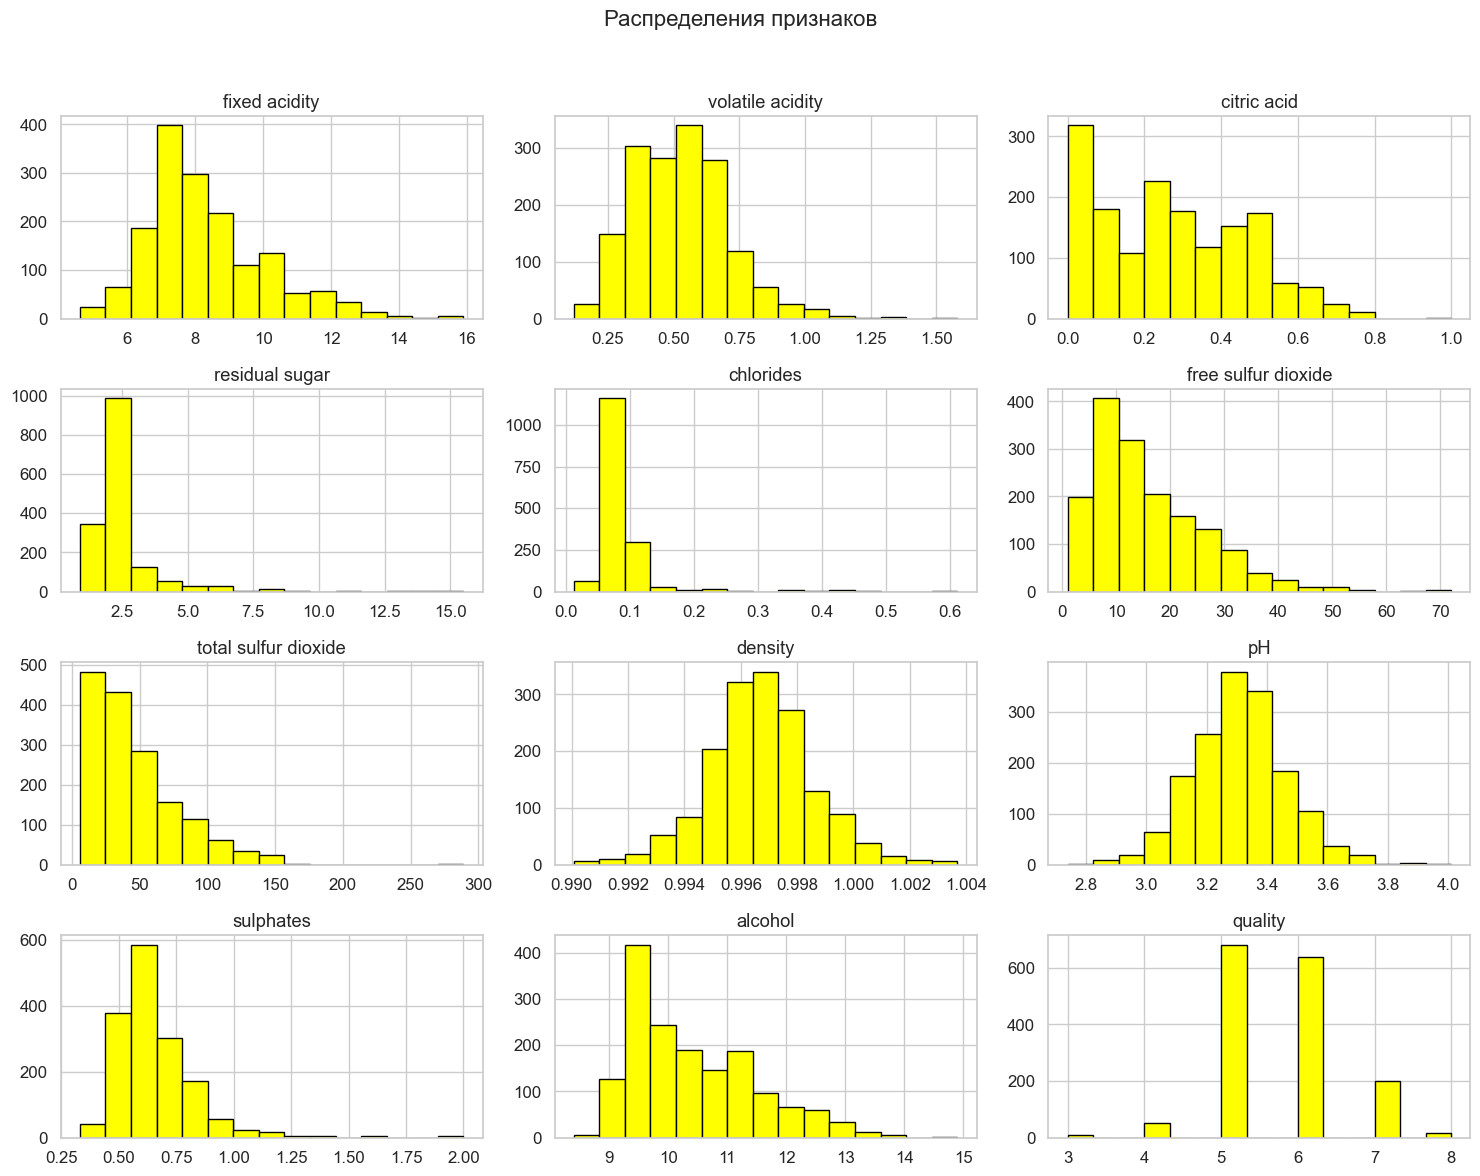

In [49]:
data.hist(bins=15, figsize=(15,12), color='yellow', edgecolor='black')
plt.suptitle("Распределения признаков", fontsize=16)
plt.tight_layout(rect=[0,0,1,0.96])

plt.show()


### Анализ гистограмм распределений

На гистограммах видно, что большинство признаков распределены несимметрично.
Некоторые параметры (например, `residual sugar`, `chlorides`) имеют длинные "хвосты" вправо — это говорит о наличии редких, но очень больших значений, то есть **выбросов**.
Признаки `alcohol` и `volatile acidity` ближе к нормальному распределению, что делает их удобными для статистического анализа.



## 6. Корреляционный анализ
Определим взаимосвязи между параметрами и целевой переменной `quality`.


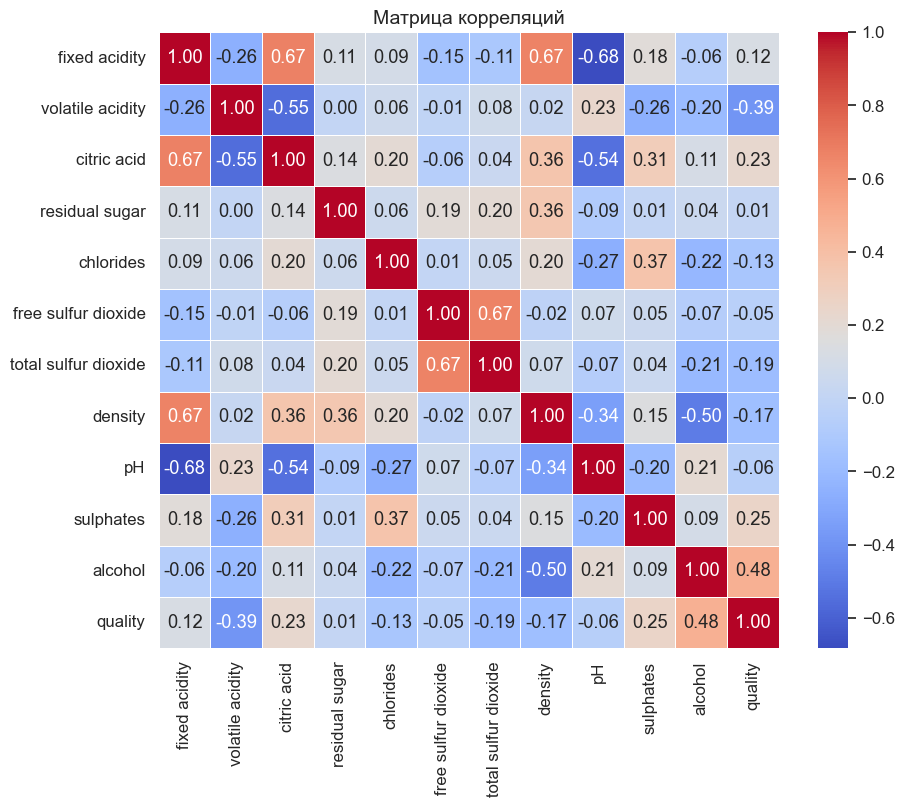

In [10]:
corr = data.corr() #коэф Пирсона между каждой парой числовых признаков
# 1 - идеальная положит корреляция, те два признака растут вместе
# -1 - идеальная отриц корреляция, те один растет, другой уменьшается
# 0 - отсутствие линейной корреляции

plt.figure(figsize=(10,8))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Матрица корреляций", fontsize=14)
plt.show()


### Анализ матрицы корреляций

Из матрицы видно, что наибольшая **положительная корреляция** с целевой переменной `quality` наблюдается у признака `alcohol` — чем выше содержание алкоголя, тем выше оценка качества вина.
Наибольшая **отрицательная корреляция** — у `volatile acidity`, то есть высокая летучая кислотность снижает качество.
Также можно заметить взаимосвязь между `density` и `alcohol`: чем выше алкоголь, тем ниже плотность напитка.
Остальные признаки имеют слабую корреляцию (меньше 0.3 по модулю), что говорит о том, что на качество влияет совокупность факторов, а не один параметр.


Из матрицы видно, что:
- наибольшая положительная корреляция с качеством наблюдается у **alcohol** и **citric acid**;
- отрицательная — у **volatile acidity**;
- некоторые признаки (например, `density` и `alcohol`) сильно связаны между собой.


## 7. Визуализация взаимосвязей (графики рассеяния)
Для более наглядного анализа построим матрицу графиков рассеяния для нескольких наиболее важных признаков.


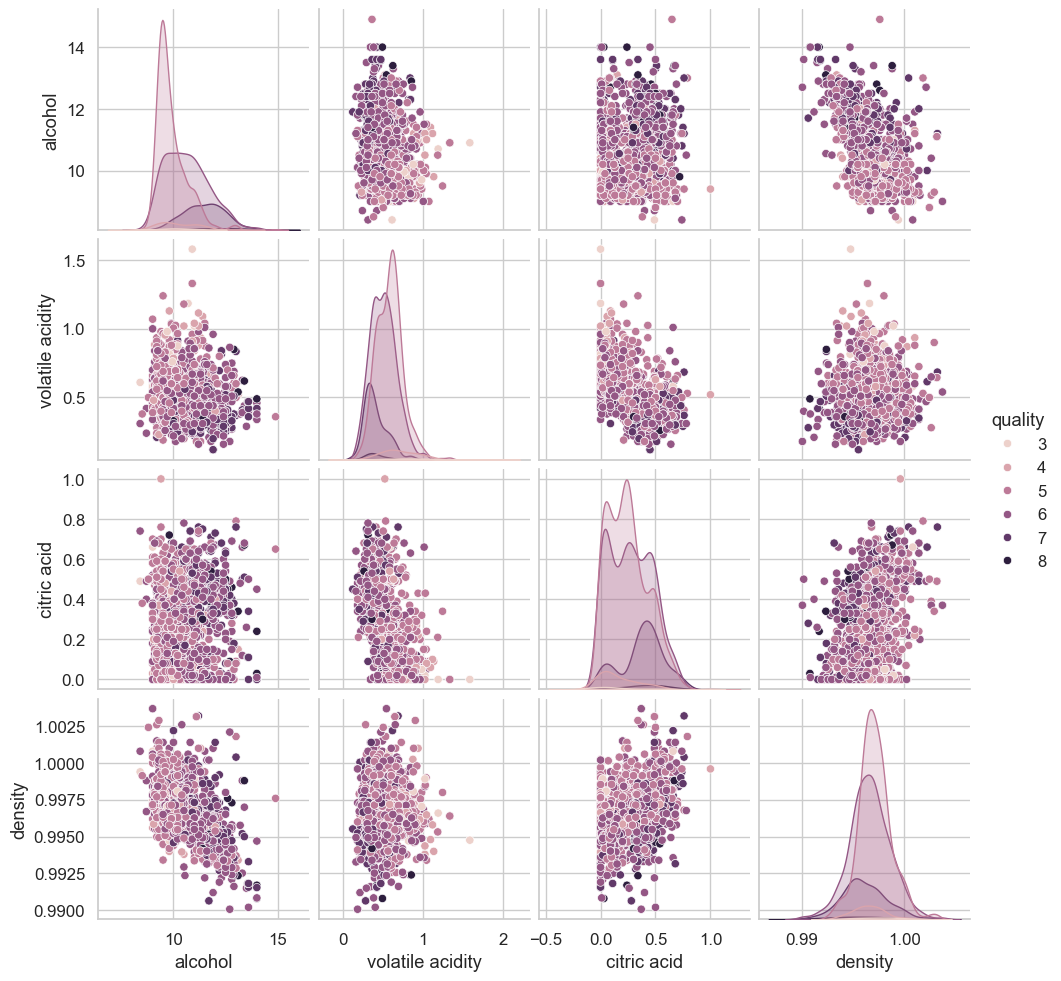

In [12]:
sns.pairplot(data[['alcohol', 'volatile acidity', 'citric acid', 'density', 'quality']], hue='quality')
plt.show()


### Анализ графиков рассеяния

Матрица графиков рассеяния (pairplot) позволяет одновременно рассмотреть взаимосвязи между признаками и распределение каждого из них.

- **Вне диагонали** расположены графики рассеяния (scatter plots), где каждая точка соответствует одному объекту из набора данных.
  По оси X и Y отложены разные признаки, и по цвету (`hue='quality'`) видно, как распределяются вина разного качества.
  Если облако точек образует наклонную линию, это указывает на наличие корреляции между признаками.
  Так, видно, что вина с более высокой оценкой качества (значения `quality` 7–8) сконцентрированы в областях с **высоким содержанием алкоголя** и **низкой летучей кислотностью**, что подтверждает результаты корреляционного анализа.
  Также признак `citric acid` немного выше у вин с лучшими оценками, а `density` у таких образцов — ниже.

- **На диагонали** отображаются распределения (в виде гистограмм или кривых плотности) каждого признака по отдельности.
  Эти графики показывают, какие значения встречаются чаще, есть ли выбросы и как распределяются данные по категориям качества.
  Например, распределение признака `alcohol` показывает, что вина с высоким качеством чаще имеют большие значения алкоголя.


## 8. Выводы

Проведённый анализ показал:
1. Датасет полностью числовой, пропусков нет, объём — 1599 наблюдений и 12 признаков.
2. Распределения некоторых признаков имеют выбросы.
3. Сильнее всего с качеством вина коррелируют `alcohol` (положительно) и `volatile acidity` (отрицательно).
4. Полученные зависимости соответствуют здравому смыслу: вина с более высоким содержанием алкоголя и низкой кислотностью чаще получают более высокую оценку.



